<a href="https://colab.research.google.com/github/DaDamola/AI-Learning/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## General Concepts

Artificial intelligence is the ability for machines to perform tasks that require a human level of intelligence. Tasks such as recognizing people in a photo or understanding human speech. AI can be reflected in computer programs or machines/robots. Computers are great at processing information, AI seeks to use that information to make smart decisions. Ideally, AI should be able to rationalize and take actions that give it the best chance of achieving a specific goal. 

Computers learn to perform tasks effectively through learning methods. Through machine learning, the goal is to have computers behave logically without receiving explicit programming to do so. That programs can access data and use it to learn independently. 

The learning starts with observations that are acquired from datasets loaded with examples. The program tries to understand the data by looking for patterns. These patterns guide the program to make better decisions based on the examples given. 

Machine learning has two main types: supervised and unsupervised. Supervised learning features a dataset with labeled examples; the program uses what its learned in the past to predict future events. Unsupervised learning features a dataset with unlabeled examples; the program works to draw inferences from the data that can reveal a trend. 

Machine learning works well for classification tasks. For example, classifying whether a fruit in a photo is an apple or banana. Generally, this learning method trains a model on a dataset in order to achieve correct predictions. The program learns from the experience of the model thats iteratively tweaked in an effort to improve the prediction accuracy. After several trials, it is expected that the model will perform well in making predictions not only on training data, but on unseen data as well. 

Deep learning is another learning method that draws from machine learning. It mimics the processes in the human brain in an effort to process data and create useable patterns that guide decision making. Deep learning performs classification tasks directly from the input which may be an image.



## Basic Concepts

Computers are trained on models. One type of model is linear regression. Linear regression uses features known as input to predict values (labels) known as output that can be used to classify things. For example, this can be used to model the problem of classifying a flower as a rose or daisy based on its size. 

An equation for a line that best fits the data points is generated. An equation in the form of y = b + wx. 

y - label (output) 

b - bias (error) 


w - weight


x - feature (input)

This equation can be used to find a value based on the feature. The label is the classification; this can be whether this is a rose or daisy. The weight is used to learn the feature(s). The bias is known as the distance between the expected answer and predicted answer. How far off the model is in obtaining a correct prediction. 

We want minimize the error, so we can get as close as possible to the correct prediction. This is done with gradient descent.
Gradient descent is used to update the parameters of the model, so we can reduce the value of our loss function. Loss functions are used to evaluate the performance of the model. The lower the value of the loss function is, the better the model is performing. 

In the code block below, the gradient and learning rate are used to update the weights to reduce the loss function. 



In [0]:
weight = initial_weight

for epoch in range(epochs):
    gradient = 1/m * X_b.T.dot(X_b.dot(weight) - y)
    weight = weight - lr * gradient

In the code block below, the prediction is calculated using the input and newly updated weight. 

In [0]:
y_predict = X_new_b.dot(weight)
y_predict

## Building a Model

When building a model a convolutional neural network is common network used to classify images. A CNN is made up of layers of nodes. The first set of nodes make up the input layer which reads in the data. This is a feature map that represents an image. The image is passed to hidden layers of nodes; these layers update the weights accordingly to extract features from the image with the help of the learning rate and other tuning parameters. Additionally, the feature map goes through convolution and pooling operations to absorb the features and compute new ones by sliding a filter over the feature map. 

Finally, the output layer of nodes known as classifier predicts the type of object in the image. This could be a specific person or animal, etc. An example of a CNN in action can be a network that reads in an image of cats and dogs and attempts to classify which is which. The weights play a vital role in representing the network's knowledge about the image, so it can properly classify things. 

Based on the type of problem, an appropiate classifier and loss function can be chosen. To make the final prediction and evaluate the prediction, respectively. 

In the code block below, the layers with the relu function are the hidden layers. The last layer with the sigmoid function is the classifier. 

In [0]:
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In the code block below, we illustrate the operation of convolution that is performed on a feature map in order to reduce it, so meaningful features can be extracted. Convolution is achieved by sliding a smaller matrix (filter) along the image and computing the dot product.

In [0]:
import numpy as np 
from scipy import signal

class SizeError(Exception): #Raised when kernel is larger than input 
  pass

def conv2d(input_mat, kernel_mat):
  kernel_mat = np.rot90(kernel_mat, 2) #flip kernel 180 degrees in convolution

  m, n = kernel_mat.shape #get kernel dimensions
  x, y = input_mat.shape #get input dimensions
  pad, stride = 0, 1 

  try:
    if (m != n or x != y): #check when the kernel and input are square
      raise ValueError
    
    #calculate rows and columns for output
    x = (x - m + 2 * pad) // stride + 1 
    y = (y - m + 2 * pad) // stride + 1 

    if x < 1: #check when kernel is larger than input
      raise SizeError

    res = np.zeros((x,y)) 

    #do scanning convolution 
    for row in range(x):
        for col in range(y):
            res[row][col] = np.sum(input_mat[row:row + m, col:col + n] * kernel_mat) 
    
    return res
  except ValueError:
    print("Both matrices must be square.")
  except SizeError:
    print("The kernel cannot be larger than the input matrix.")

In the code block below, we show the operation of max pooling which is achieved by sliding a window along the image and placing the highest values in the output matrix.

In [0]:
import numpy as np 
import skimage.measure

class SizeError(Exception): #raised when the window size is larger than input 
  pass

def maxpooling2d(input_mat, s):
  x, y = input_mat.shape #get input dimensions
  pad, stride = 0, s

  try:
    if (x != y): #check when the input is square
      raise ValueError
    
    if s > x: #check when window size is larger than input
      raise SizeError
    
    #calculate rows and columns for output
    x = (x - s + 2 * pad) // stride + 1 
    y = (y - s + 2 * pad) // stride + 1 

    res = np.zeros((x,y)) 

    #do max pooling 
    for row in range(x):
        for col in range(y):
            if col > 0:
              res[row][col] = np.max(input_mat[row:row + s, col + 1:col + s + 1]) 
            else:
              res[row][col] = np.max(input_mat[row:row + s, col:col + s]) 
    
    return res
  except ValueError:
    print("Input matrix must be a square.")
  except SizeError:
    print("Window size cannot be larger than input matrix.")

## Comping a Model

While the neural network is training on a model a learning rate can be used vary the amount in which the weights get updated. This can be used to improve the learning process. One must be mindful of the learning rate; a learning rate that is too small leads to slow learning, but one that's too large can result in wrong predictions. In other words, the learning rate controls the rate in which the network learns the model. 

In the code blocks below, a gradient descent graph is shown with varying learning rates. Where x is the weight and y is the prediction along the axes.

In [0]:
def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "b-")
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)

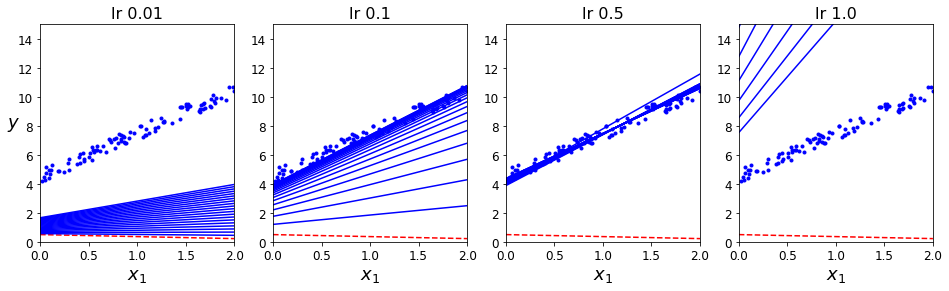

In [0]:
weight_path_bgd = []

plt.figure(figsize=(16, 4))
plt.subplot(141); plt.ylabel("$y$", rotation=0, fontsize=18); plot_gradient_descent(initial_weight, 0.01)
plt.subplot(142); plot_gradient_descent(initial_weight, 0.1, weight_path_bgd)
plt.subplot(143); plot_gradient_descent(initial_weight, 0.5)
plt.subplot(144); plot_gradient_descent(initial_weight, 1.0)
plt.show()

## Training a Model

When training a model it is important to be mindful of how the model generalizes to new data. The goal is for the training to be effective enough that the model will perform well on new data. To do this the model must avoid overfitting which is when the model performs too well on training data leading it to peform poorly on new data. Since its confined to recognizing patterns that only exist in the training data. 

Another issue to avoid is underfitting which is when the model performs poorly on training data. Thus, it has difficulty recognizing useful patterns in the training data and new data. This leads the model to make wrong, unreliable predictions. 

In the code block below, the loss and accuracy graphs show overfitting as the data points are not close to the validation line portraying that the model is not responding well to new data.

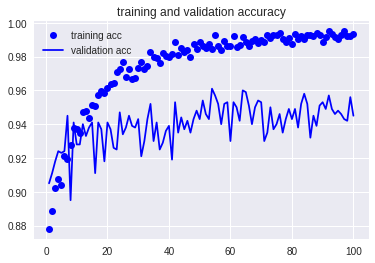

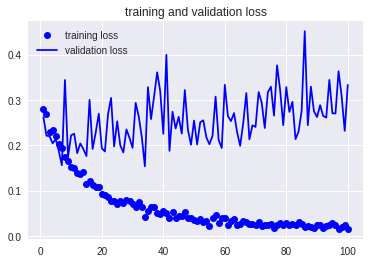

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()


## Finetuning a pretrained model

In the case when you want to use a pretrained model to solve a different, but similar problem than the original problem, you can fine tune it. First, while using an existing network the output layer can be replaced with one that suits the classification needs of the new problem such as an output layer that recognizes n classes. The output layer is attached to the model and trained on the low level features and mapped to the expected output classes. Then, the top layers of the model are unfrozen and trained. These layers are trained to adapt the specialized features for the new problem. This can improve the prediction accuracy. 

In the code block below, layer block5_conv1 is unfrozen; it must be a top layer. Now, it can undergo training.

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False